In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('E:/Backup\Project/Machine Learning/Natural language processing/Reviews.csv')

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# 1. Data pre-processing.

In [6]:
# dividing the helpfulness numerator with denominator and add column to df
df['HelpfulPercentage'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],1) # less than 0 then put 1.

In [7]:
df.head()
# new column added.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulPercentage
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0


In [8]:
df_helpfulpercentage = df['HelpfulPercentage'].unique()
df_helpfulpercentage

array([1.        , 0.8       , 0.        , 0.5       , 0.66666667,
       0.25      , 0.89473684, 0.83333333, 0.75      , 0.33333333,
       0.3       , 0.11111111, 0.42857143, 0.875     , 0.85714286,
       0.2       , 0.26315789, 0.6       , 0.71428571, 0.53846154,
       0.57142857, 0.91489362, 0.86666667, 0.82352941, 0.78571429,
       0.74074074, 0.4       , 0.375     , 0.28571429, 0.14285714,
       0.77777778, 0.125     , 0.9       , 0.94117647, 0.92307692,
       0.7       , 0.45454545, 0.88888889, 0.83870968, 0.9047619 ,
       0.92857143, 0.90909091, 0.91666667, 0.84615385, 0.10526316,
       0.98214286, 0.97826087, 0.7518797 , 0.3125    , 0.1       ,
       0.18518519, 0.88      , 0.69230769, 0.625     , 0.54545455,
       0.41666667, 0.45833333, 0.22222222, 0.81818182, 0.8125    ,
       0.16666667, 0.93103448, 0.88235294, 0.23529412, 0.63636364,
       0.81481481, 0.95652174, 0.64285714, 0.58333333, 0.94444444,
       0.921875  , 0.86574074, 0.96      , 0.91304348, 0.64705

In [9]:
# categorize the 'HelpfunPercentage' to 6 groups ('Empty','0-20%','20-40%','40-60%','60-80%','80-100%') ranging from (-1,0,0.2,0.4,0.6,0.8,1)
df['percentageUpvote']=pd.cut(df['HelpfulPercentage'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulPercentage,percentageUpvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,80-100%
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,80-100%


# 2.EDA

In [11]:
# grouping the score basis of percentageUpvote using count.
df.groupby(['Score','percentageUpvote']).agg('count')

Id  ProductId  UserId  ProfileName  \
Score percentageUpvote                                           
1     Empty               8060       8060    8060         8060   
      0-20%               2338       2338    2338         2338   
      20-40%              4649       4649    4649         4649   
      40-60%              6586       6586    6586         6586   
      60-80%              5838       5838    5838         5836   
      80-100%            24797      24797   24797        24795   
2     Empty               4234       4234    4234         4234   
      0-20%                762        762     762          762   
      20-40%              1618       1618    1618         1618   
      40-60%              3051       3051    3051         3051   
      60-80%              2486       2486    2486         2486   
      80-100%            17618      17618   17618        17617   
3     Empty               5062       5062    5062         5062   
      0-20%                474        474     474          474   
      20-40%              1506       1506    1506         1506   
      40-60%              3384       3384    3384         3384   
      60-80%              2754       2754    2754         2754   
      80-100%            29460      29460   29460        29460   
4     Empty               4780       4780    4780         4780   
      0-20%                116        116     116          116   
      20-40%               909        909     909          909   
      40-60%              3185       3185    3185         3185   
      60-80%              2941       2941    2941         2941   
      80-100%            68723      68723   68723        68723   
5     Empty              11638      11638   11638        11638   
      0-20%                432        432     432          432   
      20-40%              2275       2275    2275         2275   
      40-60%             10312      10312   10312        10312   
      60-80%             11060      11060   11060        11060   
      80-100%           327404     327404  327404       327393   

                        HelpfulnessNumerator  HelpfulnessDenominator    Time  \
Score percentageUpvote                                                         
1     Empty                             8060                    8060    8060   
      0-20%                             2338                    2338    2338   
      20-40%                            4649                    4649    4649   
      40-60%                            6586                    6586    6586   
      60-80%                            5838                    5838    5838   
      80-100%                          24797                   24797   24797   
2     Empty                             4234                    4234    4234   
      0-20%                              762                     762     762   
      20-40%                            1618                    1618    1618   
      40-60%                            3051                    3051    3051   
      60-80%                            2486                    2486    2486   
      80-100%                          17618                   17618   17618   
3     Empty                             5062                    5062    5062   
      0-20%                              474                     474     474   
      20-40%                            1506                    1506    1506   
      40-60%                            3384                    3384    3384   
      60-80%                            2754                    2754    2754   
      80-100%                          29460                   29460   29460   
4     Empty                             4780                    4780    4780   
      0-20%                              116                     116     116   
      20-40%                             909                     909     909   
      40-60%                            3185                    3185    318

In [12]:
df_s = df.groupby(['Score','percentageUpvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,percentageUpvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,24797
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [13]:
# display in matrix form.
pivot = df_s.pivot(index='percentageUpvote',columns='Score')
pivot

Id                             
Score                 1      2      3      4       5
percentageUpvote                                    
Empty              8060   4234   5062   4780   11638
0-20%              2338    762    474    116     432
20-40%             4649   1618   1506    909    2275
40-60%             6586   3051   3384   3185   10312
60-80%             5838   2486   2754   2941   11060
80-100%           24797  17618  29460  68723  327404

<AxesSubplot:xlabel='None-Score', ylabel='percentageUpvote'>

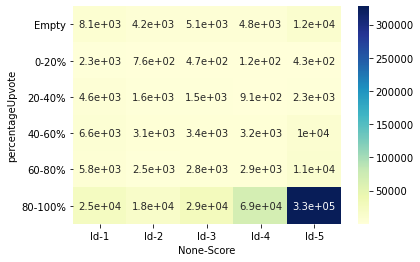

In [14]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu')
# 327404 customer give 5-star.
# till percentage-vote and score.

# 3.Bag of words
    - ML model can only perform on integer or float data to perform regression or ...
    - so we use NLP to convert text-> int(vector) , so that we can predict.

eg: review 1
eg: review 2
## step 1: lower the sentences.
## step 2: tokenization (split sentences into each word/column)
## step 3: historgram ( frequency of words.)
## step 4: filter words. ( remove stop-words)
## step 5: create DTM


# 4. Logistic Regression ( classification algorithm)
* Drawback of linear regression. 
- ![](files/5.jfif)
    -  Best fit line.
    - Use only if data is linearly separable. (y = mx + c)
    -  Deviated by outliers.
    -  most of the time, probability>1, R<0, here linear regression get stucks. 
        - if we have to predict the large value, then best fit line will greater than 1.
        - similarly, if we predict negative side, it will give negative probability
* ## To solve the linear regression Drawback: ( we use Logistic Regression)
- ![](files/6.jfif)
- ![](files/7.jfif)
    - we use concept of sigmoid function.( it is not linear graph. (curve))
- ![](files/1.png)
- ![](files/2.png)
- ![](files/3.png)
- ![](files/4.png)
    - remove flutuation from outliers
    - cost function. we take max-summation from optimizer. (from multiple best fit line.)
        0 which best fit line has max value, we select the best fit line.

# 5. Apply Bag of words.

In [15]:
df.Score.unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [16]:
# score 3 is neutral, it make no sense to predict for netural, we remove it.
df2 = df[df.Score !=3]

In [17]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulPercentage,percentageUpvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,80-100%
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,80-100%


In [18]:
# Score is dependent variable
x = df2.Text
x.shape

(525814,)

In [19]:
y_dict  = {1:0,2:0, 4:1,5:1}
# replace to 0 if less than 3, else 1
y = df2.Score.map(y_dict)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
c = CountVectorizer(stop_words=['english','he','she','hello','hi','bye'])
x_c = c.fit_transform(x)
x_c.shape

(525814, 115276)

In [22]:
# now we need to make model and check the accuracy.
# for this we need to seperate our data into train and test
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_c,y)
x_train.shape
# default 75% to train and 25% to test.

(394360, 115276)

In [24]:
# perform logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
model = log.fit(x_train,y_train)

C:\Users\rabin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model.score(x_test,y_test)

0.9378870175118292

In [27]:
w = c.get_feature_names()
coef = model.coef_.tolist()[0]
coef_df = pd.DataFrame({'Word':w,'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.383574
1,000,-0.045822
2,0000,0.009805
3,000001,-0.000573
4,00001,-0.002864
...,...,...
115271,çaykur,0.000323
115272,çelem,-0.025423
115273,être,0.000000
115274,île,0.006305


In [28]:
 coef_df = coef_df.sort_values(['Coefficient','Word'],ascending=False)
 coef_df

,Word,Coefficient
55150,hooked,2.711871
80796,pleasantly,2.639110
19523,beat,2.480341
94882,skeptical,2.275439
86935,refreshing,2.055553
...,...,...
107648,undrinkable,-2.326761
114627,yuck,-2.695240
37629,disappointment,-2.754600
113464,worst,-2.995270


In [29]:
# top 20 positive words
print(coef_df.head(20))

               Word  Coefficient
55150        hooked     2.711871
80796    pleasantly     2.639110
19523          beat     2.480341
94882     skeptical     2.275439
86935    refreshing     2.055553
113437      worried     2.013051
35705     delicious     1.947471
91116     satisfied     1.916133
79084       perfect     1.798669
114667          yum     1.768216
103085     terrific     1.755832
43308     excellent     1.738199
44843     favorites     1.725449
5867       addicted     1.649920
11025       awesome     1.600430
76492   outstanding     1.595186
44542     fantastic     1.594549
114735        yummy     1.556087
54249      hesitant     1.538036
61055         keeps     1.530075


In [30]:
# top 20 negative words
print(coef_df.tail(20))

                  Word  Coefficient
11033            awful    -1.753926
85455           rancid    -1.757252
57591         inedible    -1.779950
93245            shame    -1.824740
90064           ruined    -1.837861
25005        cancelled    -1.855451
46178       flavorless    -1.894080
88554        returning    -1.927108
94962             skip    -1.945820
103073        terrible    -1.959754
35053        deceptive    -1.988432
30804          concept    -2.083713
55199            hopes    -2.190187
96725          sounded    -2.284900
102266       tasteless    -2.317053
107648     undrinkable    -2.326761
114627            yuck    -2.695240
37629   disappointment    -2.754600
113464           worst    -2.995270
37626    disappointing    -3.081150


# 6.Automate NLP model
    - Automation the step applied above. in one function.

In [31]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    model =ml_model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = model.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [34]:
text_fit(x, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Model Accuracy: 0.9368904711914434


-Top 20 positive-
         Word  Coefficient
   pleasantly     4.059464
     downside     3.512816
    skeptical     2.875270
    addicting     2.855188
     drawback     2.555880
       hooked     2.527982
       delish     2.300123
     soothing     2.281004
       resist     2.273542
     terrific     2.234121
    delighted     2.156157
     thankful     2.140530
        penny     

# 7.Lets define a predict function

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [38]:
predict(x,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[[ 15084   2847]
 [  5541 107982]]
0.9361906066000274


# 8. TF-IDF (Term-Frequency Inverse-Doucment-Frequency)
    - eg: Doc1 = It's going to rain today.
    - eg: Doc2 = I am not going outside.

- ## TF:
        - step 1: lovercase
        - TF = no of occurance of a word in document / no of words in that document.

Words/Doc | Doc1 | Doc2 |
--- | --- | --- |
going | 1/6 | 1/6 |
to | 1/6 | 0 |
today | 1/6 | 1/6 |
i | 0 | 1/6 |
am | 0 | 1/6 |
it | 1/6 | 0 |
is | 1/6 | 0 |
rain | 1/6 | 0|
outside | 0 | 1/6 |

- ## IDF:
    - log(total no of docs / no of docs containing words)
    - eg:
        - log(2/2) = log(1) = 0
Words/Doc | IDF-Value|
--- | --- |
going | log(2/2) |
to | log(2/1) |
today | log(2/2) |
i | log(2/1)|
am | log(2/1) |
it | log(2/1) |
is | log(2/1) |
rain | log(2/1) |
outside | log(2/1) |

### RF * IDF = final matrix -> pass into Machine Learning Algorithm.
    - multiply each column of RF to IDF
 f | f1 |f2 |f3 |f4 |f5 |f6 |f7 |f8 |f9 |
--- | --- | --- |--- |--- |--- |--- |--- |--- |--- |
 word | going | to | today | i | am | it | is | rain | outsude|
Doc1 | 0 | log(2)/6 | 0 | 0| 0| log(2)/6 | log(2)/6 | 0 | 0|
D0c2 | 0 | 0 | 0| log(2)/6 | log(2)/6| 0 | 0| 0| log(2)/6| 

# 9. Apply (TF-IDF) Some more technique of Machine Learning.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(x, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Model Accuracy: 0.9343572656594702


-Top 20 positive-
       Word  Coefficient
      great    13.888425
  delicious    12.264890
       best    11.654575
    perfect    10.873829
  excellent     9.583821
      loves     9.495899
     highly     8.602208
       love     8.476965
  wonderful     8.231128
    amazing     7.779571
    awesome     7.533100
       good     7.314543
    pleased     7.227928
     hooked     6.9

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(x, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[[ 14158   2364]
 [  6405 108527]]
0.9332922543247067


# 10. Upvote Prediction

In [45]:
# We will be focusing on score 5 reviews, and get rid of comments with neutral votes
data = df[df['Score'] == 5]

In [47]:
data2 = data[data['percentageUpvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(341171, 12)

In [48]:
x = data2['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['percentageUpvote'].map(y_dict)

In [49]:
print(y.value_counts())

1.0    338464
0.0      2707
Name: percentageUpvote, dtype: int64


## The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
* Let's resample the data to get balanced data:
## Imbalance data:
    - In ML either we have usecase-> regression , classification , clusture
    - What ever usecase , in case of regression we have to deal with outliers, which may impact our accuracy. so we have to deal with outliears.
    - In classification usecase:
        - if we have to check if a person is diabetic(1) or not (0)
        - if 900 have diabetic and 100 are not.
        - There will be huge flutuation in count/data.
        - when in training ( logictic,decision tree, or any classification algorithm), they will learn any type of relation.
        - They will learn 90% time output is goint to be 1.
        - it will predict mostly 1 and occur OverFitting.
        - The ML will baised towards the higher number of count.(here 1)
        - When testing in new data, it will mostly predict 1(diabetic)
        - Its drawback of having Imbalance of data.
    ## To handle this Imbalance is:
        - Under sampling (1000) approach (in data set is small(not applicable of realword))
            - In realword there are data in billion of data (TB,PB)
            - It will eliminate some of data to make sure, what ever unique categories in output feature must be in same ratio.
        - Over sampling approach : Data is huge.
            - Data is precious, so no data will be eliminate.
            - it will add some extra data point to know(outliears).
            - if data loss, no point in predicting.
        - SMOTE TOMEK approach
        - Ensemble Technique
            - eg: Random Forest
            - contain multiple decison tree.
            - decision tree some kind of prediction.
        - ## Go with -> Over sampling and Ensemble Technique.
        

## Cross validation and when to use it.
    - It increases accuracy.
    - What even usecase we have, (regression, classification)
    - spread data into train_test_split(independent-data,dependent_data,ramdom_state=2)
        - ramdom_state = 2 -> will change the training data each and every time.
        - If data changes,accuracy will be change and learn new relation.
* ## To reduce this flutuation in accuracy: (Cross_validation)
    - cv=5 -> corss validate data 5 times.
    - When cv = 1:
        - first 80% -> train_data.
        - last 20% -> test_data.
    - When cv = 2:
        - first 60% -> train_data
        - then 20% -> test_data
        - last 20% -> train_data
    - and so on.
    - ## we get 5 accuracy: we take mean of the accuracy.

## Cross Validation Approach
    - Grid Search CV
    - Randomized Search CV
* In our ML algorithm, either we use Regression / Classifiers
    - eg: in Random Forest
    - we use default parameters. { n_extimators, max_features, max_depth }
    * To acheive the best value of the parameters. We need to use (Grid, Random Search CV)
        - dict {'n_estimators':[100,200,300,400],
                'max_features':['auto','log2','sqrt'],
                'max_depth':[2,3,4,5]}
        - ### GridSeachCV(object,param_grid = dict,cv=5,etc)
            - It will perform permutation and combination with each and every parameters, and which ever pair gives higher accuracy, we will consider the pair and we will fit out pair, then perform training.
            - It will return the best parameter and best model.
        - ### Ramdomized Search CV
            - It is better than GridSeachCV with respect to computation.
            - It will select ramdom pair and perform training.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tf=TfidfVectorizer()
x_c=tf.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_c,y,train_size=0.7)

In [54]:
y_test.value_counts()

1.0    101521
0.0       831
Name: percentageUpvote, dtype: int64